# SVM & NN Homework
##### by Mehdi Lotfipour

In [1]:
import numpy as np
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#generate a dataset from matrix of centers
#and list of variance and list of target
#with n samples of each distribution
def data_gen(m, s, t, n):
    #structure of dataset
    X = np.zeros([n * len(m), 2])
    Y = np.zeros(n * len(m))
    #generating samples of each distribution
    for i in range(len(m)):
        X[n*i: n*(i+1), 0] = np.random.normal(m[i,0], s[i], n)
        X[n*i: n*(i+1), 1] = np.random.normal(m[i,1], s[i], n)
        Y[n*i: n*(i+1)] = np.ones(n) * t[i]
    return X, Y

### Q 4.1 - Part a, b, c
Here we generate 4 distribution of random points which belong to two classes. We define them by their center vectors and sigmas and then make a train and test dataset by "data_gen" function.

In [2]:
#matrix of centers has 4 two-dim vectors 
m = [[5, 5], [-5, -5], [5, -5], [-5, 5]]
#variance of 4 distribution
s = [2, 2, 2, 2]
#label target of 4 distribution
t = [1, 1, -1, -1]
X, Y = [0,0,0,0,0], [0,0,0,0,0]
m = np.array(m)
X[1] ,Y[1] = data_gen(m, s, t, 100)
X[2] ,Y[2] = data_gen(m, s, t, 100)
s = [5, 5, 5, 5]
X[3] ,Y[3] = data_gen(m, s, t, 100)
X[4] ,Y[4] = data_gen(m, s, t, 100)

### Q 4.1 - Part d
Now its time to show the result on a two dimensional plane.

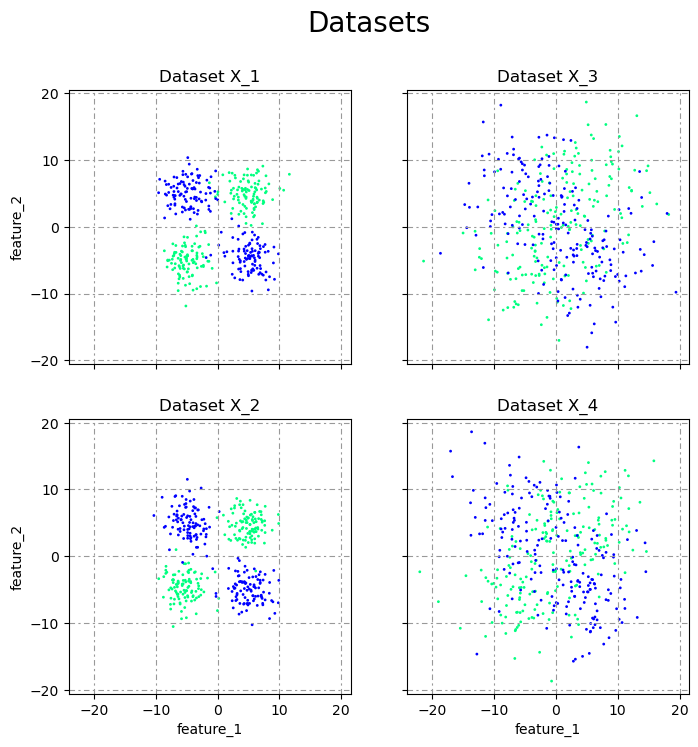

In [3]:
#it's better to scale the dataset now,
#but we don't
#normalizing data
#scaler = StandardScaler()
#scaler.fit(X_1)
#X_1 = scaler.transform(X_1) 
#X_2 = scaler.transform(X_2)
#scaler.fit(X_3)
#X_3 = scaler.transform(X_3) 
#X_4 = scaler.transform(X_4)

#plotting 4 datasets w.r.t labels
fig, ax = plt.subplots(2,2, sharex= True, sharey= True, figsize=(8,8),dpi=100)
fig.suptitle('Datasets', fontsize=20)
#titles
ax[0,0].set_title('Dataset X_1')
ax[1,0].set_title('Dataset X_2')
ax[0,1].set_title('Dataset X_3')
ax[1,1].set_title('Dataset X_4')
#x~y labels
ax[1,0].set_xlabel('feature_1')
ax[1,1].set_xlabel('feature_1')
ax[0,0].set_ylabel('feature_2')
ax[1,0].set_ylabel('feature_2')
#x~y ticks
ax[0,0].xaxis.set_ticks(np.arange(-20, 20.1, 10))
ax[0,0].yaxis.set_ticks(np.arange(-20, 20.1, 10))
#plotting data points
ax[0,0].scatter(X[1][:, 0], X[1][:, 1], c= Y[1], cmap= 'winter', s= 1)
ax[1,0].scatter(X[2][:, 0], X[2][:, 1], c= Y[2], cmap= 'winter', s= 1)
ax[0,1].scatter(X[3][:, 0], X[3][:, 1], c= Y[3], cmap= 'winter', s= 1)
ax[1,1].scatter(X[4][:, 0], X[4][:, 1], c= Y[4], cmap= 'winter', s= 1)
#legend
#ax[0,0].legend(loc=0, title="Class")

#grids
ax[0,0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[0,1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1,0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1,1].grid(True, color='0.6', dashes=(5, 3, 2, 3))

### Q 4.2 - Part a, b
Here we want to see the effect of hidden layer size in a simple MLP. We have two dimensional input, one dimensional output and some neurons between them. We try 3 different size "2 , 4 , 15". "ReLU" is used for activation function, maximum iteration is 1000 and learning rate is constant and initialized by 0.01.

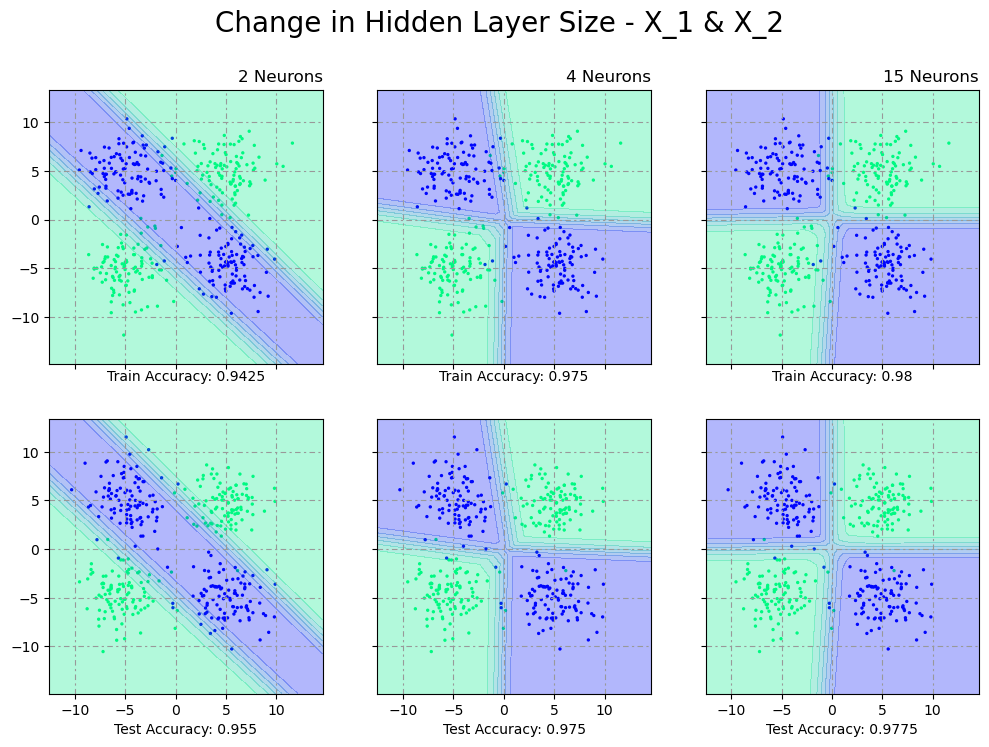

In [4]:
#structure of result figures
fig, ax = plt.subplots(2, 3, sharex= True, sharey= True, figsize=(12,8), dpi=100)
fig.suptitle('Change in Hidden Layer Size - X_1 & X_2', fontsize=20)
conditions = [2, 4, 15]

#trying 3 sizes for hidden layar size
for i, h_size in enumerate(conditions):    
    
    #defining a Multi Layer Perceptron with learning rate of 0.01
    #and 1000 iteration and "h_size" neuron in hidden layer
    clf = MLPClassifier(hidden_layer_sizes= h_size, solver= 'sgd', activation= 'relu',
                        learning_rate= 'constant', learning_rate_init= 0.01,
                        alpha= 10**-4, max_iter= 1000)
    
    #training phase on X_1
    clf.fit(X[1], Y[1])
    #calculating accuracy of train
    num_correct_points = sum(clf.predict(X[1]).reshape(-1) == Y[1].reshape(-1))
    acc_train = num_correct_points / X[1].shape[0]
    #calculating accuracy of test
    num_correct_points = sum(clf.predict(X[2]).reshape(-1) == Y[2].reshape(-1))
    acc_test = num_correct_points / X[2].shape[0]
    
    #plotting the result
    #making a mesh grid for showing the boundries
    x_min, x_max = X[1][:, 0].min() - 3, X[1][:, 0].max() + 3
    y_min, y_max = X[1][:, 1].min() - 3, X[1][:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    #accuracy
    ax[0,i].set_xlabel(f'Train Accuracy: {acc_train}')
    ax[1,i].set_xlabel(f'Test Accuracy: {acc_test}')
    #title
    ax[0,i].set_title(f'{h_size} Neurons', loc= 'right')
    #datapoints of X_1 & X_2
    ax[0,i].scatter(X[1][:, 0], X[1][:, 1], c= Y[1], cmap= 'winter', s= 2)
    ax[1,i].scatter(X[2][:, 0], X[2][:, 1], c= Y[2], cmap= 'winter', s= 2)
    #boundries
    ax[0,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    ax[1,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    #grid
    ax[0,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))
    ax[1,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))

### Q 4.2 - Part c
For this exercise, two neurons on hidden layer is not enough. But 4 and 15 neurons perform the same way because we have only two class.
### Q 4.3 - Part a, b
Now we want to see how learning rates and iteration effect the final result. So we try two different learning rates and two maximum iteration. For other parameters we use 4 neurons in hidden layaer and "ReLU" activation function.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


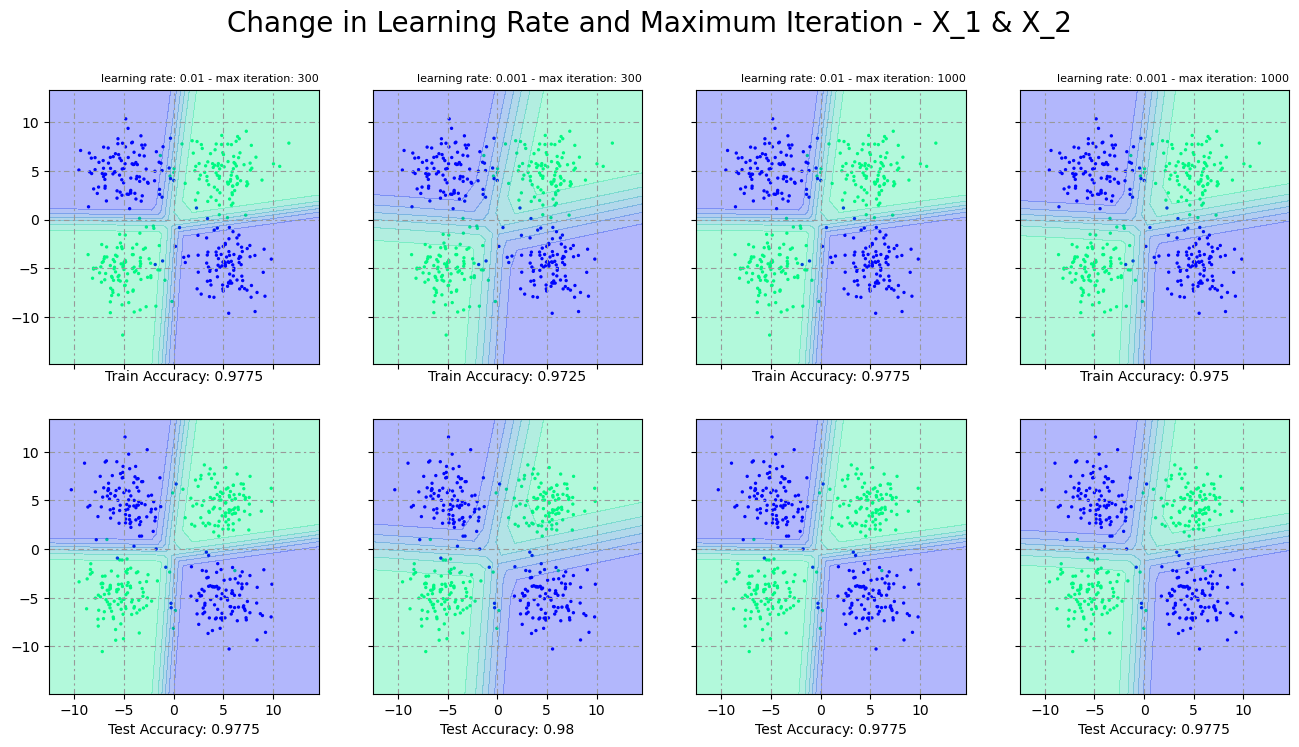

In [5]:
#structure of result figures
fig, ax = plt.subplots(2, 4, sharex= True, sharey= True, figsize=(16,8), dpi=100)
fig.suptitle('Change in Learning Rate and Maximum Iteration - X_1 & X_2', fontsize=20)
conditions = [[0.01, 300],[0.001, 300],
              [0.01, 1000],[0.001, 1000]]

#trying 4 different condition for learning rates and maximum iteration
for i, condition in enumerate(conditions):    
    
    #defining a Multi Layer Perceptron with learning rate of condition[0]
    #and condition[1] iteration and 4 neuron in hidden layer
    clf = MLPClassifier(random_state=5, hidden_layer_sizes= 4, solver= 'sgd', activation= 'relu',
                        learning_rate= 'constant', learning_rate_init= condition[0],
                        alpha= 10**-4, max_iter= condition[1])
    
    #training phase on X_1
    clf.fit(X[1], Y[1])
    #calculating accuracy of train
    num_correct_points = sum(clf.predict(X[1]).reshape(-1) == Y[1].reshape(-1))
    acc_train = num_correct_points / X[1].shape[0]
    #calculating accuracy of test
    num_correct_points = sum(clf.predict(X[2]).reshape(-1) == Y[2].reshape(-1))
    acc_test = num_correct_points / X[2].shape[0]
    
    #plotting the result
    #making a mesh grid for showing the boundries
    x_min, x_max = X[1][:, 0].min() - 3, X[1][:, 0].max() + 3
    y_min, y_max = X[1][:, 1].min() - 3, X[1][:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    #accuracy
    ax[0,i].set_xlabel(f'Train Accuracy: {acc_train}')
    ax[1,i].set_xlabel(f'Test Accuracy: {acc_test}')
    #title
    ax[0,i].set_title(f'learning rate: {condition[0]} - max iteration: {condition[1]}', loc= 'right', fontsize=8)
    #datapoints of X_1 & X_2
    ax[0,i].scatter(X[1][:, 0], X[1][:, 1], c= Y[1], cmap= 'winter', s= 2)
    ax[1,i].scatter(X[2][:, 0], X[2][:, 1], c= Y[2], cmap= 'winter', s= 2)
    #boundries
    ax[0,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    ax[1,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    #grid
    ax[0,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))
    ax[1,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))

### Q 4.3 - Part c
For this exercise we only see that for higher value of learning rate, our network converges faster. First and second columns of figure are for the same iteration but different learning rates. The contours are decision boundries and for higher learning rate we have a more clean decision boundry. By comparing the second and forth (or fisrst and third) column of figures we see that maximum number of iteration is like learning rate. by increasing it, we will have a more clean boundry.
### Q 4.5
Now we will do the same experiment on dataset of X_3 and X_4 as train and test set. This time we have a data that are not easily separable. We will have less accuracy.

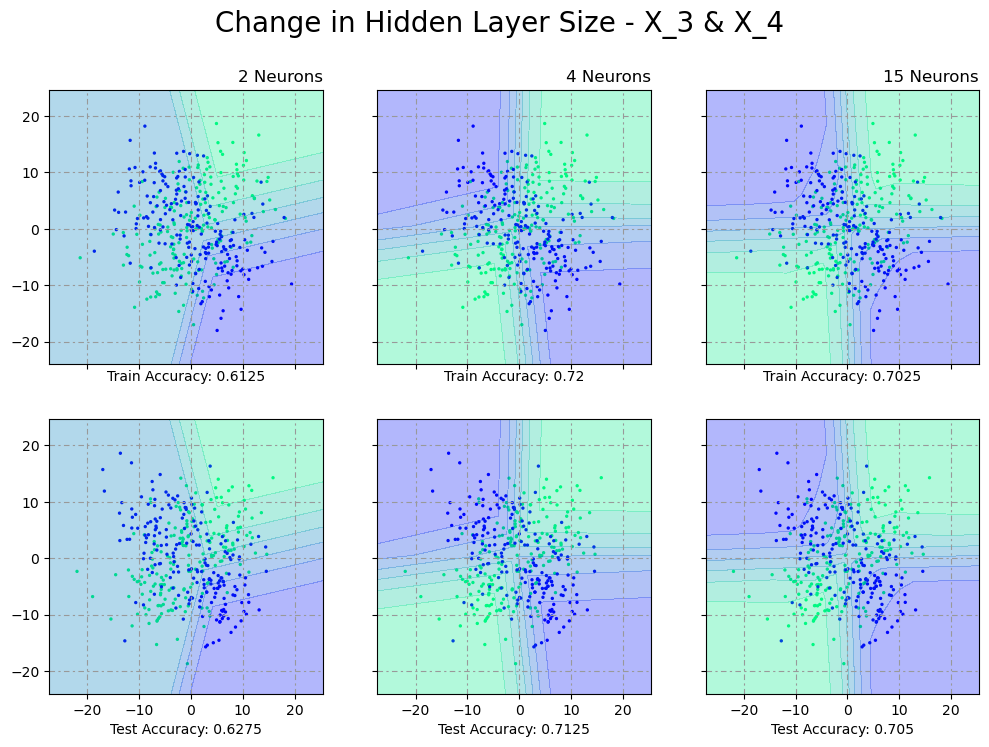

In [6]:
#structure of result figures
fig, ax = plt.subplots(2, 3, sharex= True, sharey= True, figsize=(12,8), dpi=100)
fig.suptitle('Change in Hidden Layer Size - X_3 & X_4', fontsize=20)
conditions = [2, 4, 15]

#trying 3 sizes for hidden layar size
for i, h_size in enumerate(conditions):     
    
    #defining a Multi Layer Perceptron with learning rate of 0.01
    #and 1000 iteration and "h_size" neuron in hidden layer
    clf = MLPClassifier(hidden_layer_sizes= h_size, solver= 'sgd', activation= 'relu',
                        learning_rate= 'constant', learning_rate_init= 0.01,
                        alpha= 10**-4, max_iter= 1000)
    
    #training phase on X_3
    clf.fit(X[3], Y[3])
    #calculating accuracy of train
    num_correct_points = sum(clf.predict(X[3]).reshape(-1) == Y[3].reshape(-1))
    acc_train = num_correct_points / X[3].shape[0]
    #calculating accuracy of test
    num_correct_points = sum(clf.predict(X[4]).reshape(-1) == Y[4].reshape(-1))
    acc_test = num_correct_points / X[4].shape[0]
    
    #plotting the result
    #making a mesh grid for showing the boundries
    x_min, x_max = X[3][:, 0].min() - 6, X[3][:, 0].max() + 6
    y_min, y_max = X[3][:, 1].min() - 6, X[3][:, 1].max() + 6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    #accuracy
    ax[0,i].set_xlabel(f'Train Accuracy: {acc_train}')
    ax[1,i].set_xlabel(f'Test Accuracy: {acc_test}')
    #title
    ax[0,i].set_title(f'{h_size} Neurons', loc= 'right')
    #datapoints of X_3 & X_4
    ax[0,i].scatter(X[3][:, 0], X[3][:, 1], c= Y[3], cmap= 'winter', s= 2)
    ax[1,i].scatter(X[4][:, 0], X[4][:, 1], c= Y[4], cmap= 'winter', s= 2)
    #boundries
    ax[0,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    ax[1,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    #grid
    ax[0,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))
    ax[1,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


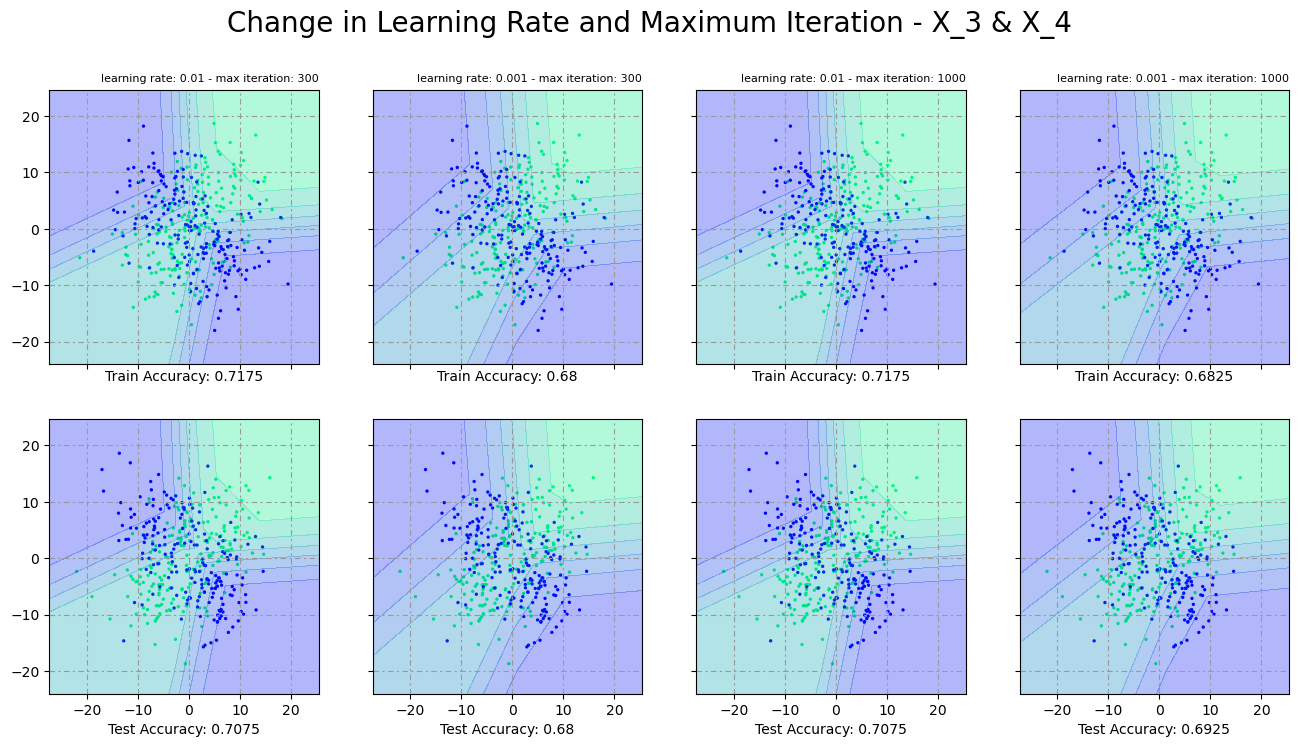

In [7]:
#structure of result figures
fig, ax = plt.subplots(2, 4, sharex= True, sharey= True, figsize=(16,8), dpi=100)
fig.suptitle('Change in Learning Rate and Maximum Iteration - X_3 & X_4', fontsize=20)
conditions = [[0.01, 300],[0.001, 300],
              [0.01, 1000],[0.001, 1000]]

#trying 4 different condition for learning rates and maximum iteration
for i, condition in enumerate(conditions):    
    
    #defining a Multi Layer Perceptron with learning rate of condition[0]
    #and condition[1] iteration and 4 neuron in hidden layer
    clf = MLPClassifier(random_state=5, hidden_layer_sizes= 4, solver= 'sgd', activation= 'relu',
                        learning_rate= 'constant', learning_rate_init= condition[0],
                        alpha= 10**-4, max_iter= condition[1])
    
    #training phase on X_3
    clf.fit(X[3], Y[3])
    #calculating accuracy of train
    num_correct_points = sum(clf.predict(X[3]).reshape(-1) == Y[3].reshape(-1))
    acc_train = num_correct_points / X[3].shape[0]
    #calculating accuracy of test
    num_correct_points = sum(clf.predict(X[4]).reshape(-1) == Y[4].reshape(-1))
    acc_test = num_correct_points / X[4].shape[0]
    
    #plotting the result
    #making a mesh grid for showing the boundries
    x_min, x_max = X[3][:, 0].min() - 6, X[3][:, 0].max() + 6
    y_min, y_max = X[3][:, 1].min() - 6, X[3][:, 1].max() + 6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    #accuracy
    ax[0,i].set_xlabel(f'Train Accuracy: {acc_train}')
    ax[1,i].set_xlabel(f'Test Accuracy: {acc_test}')
    #title
    ax[0,i].set_title(f'learning rate: {condition[0]} - max iteration: {condition[1]}', loc= 'right', fontsize=8)
    #datapoints of X_3 & X_4
    ax[0,i].scatter(X[3][:, 0], X[3][:, 1], c= Y[3], cmap= 'winter', s= 2)
    ax[1,i].scatter(X[4][:, 0], X[4][:, 1], c= Y[4], cmap= 'winter', s= 2)
    #boundries
    ax[0,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    ax[1,i].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    #grid
    ax[0,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))
    ax[1,i].grid(True, color='0.6', dashes=(5, 3, 2, 3))

The only thing that have changed w.r.t previous question is accuracy. On X_1 & X_2 we had accuracy of ~99%, but here we have ~75%.
### Q 4.6 - Part a, b
Now we change our method and use Support Vector Machines instead of Neural Network. We will use a support vector classifier by different parameters. We will change the "C" parameters to show the effect of regularization and "sigma" to show the effect of RBF kernel sigmas. In this part we will show only datapoints of train set and only report the accuracy of test set. For model complexity we will report the number of support vectors for each combination of "C" & "sigma".

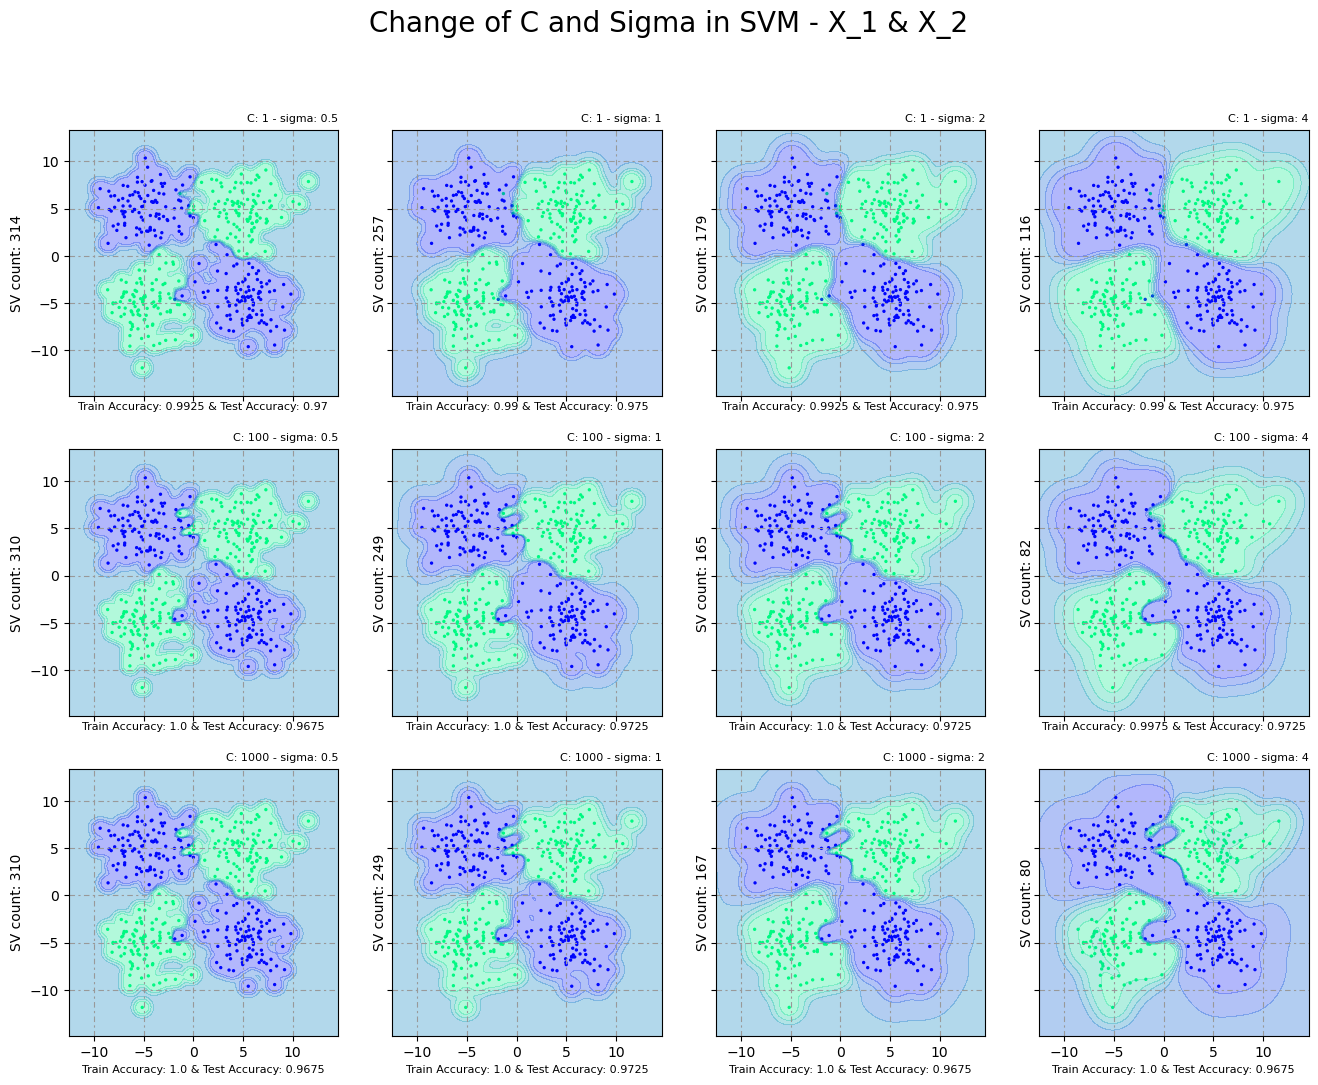

In [8]:
#structure of result figures
fig, ax = plt.subplots(3, 4, sharex= True, sharey= True, figsize=(16,12), dpi=100)
fig.suptitle('Change of C and Sigma in SVM - X_1 & X_2', fontsize=20)
conditions = [[1, 0.5], [1, 1], [1, 2], [1, 4],
              [100, 0.5], [100, 1], [100, 2], [100, 4],
              [1000, 0.5], [1000, 1], [1000, 2], [1000, 4]]

#trying different condition for C and sigma
for i, condition in enumerate(conditions):    
    
    #defining a SVM with tolerance of 0.001
    clf = svm.SVC(kernel= 'rbf', probability= True,
              tol= 0.001, C= condition[0], gamma= 1 / condition[1])          
              
    #training phase on X_1
    clf.fit(X[1], Y[1])
    #calculating accuracy of train
    num_correct_points = sum(clf.predict(X[1]).reshape(-1) == Y[1].reshape(-1))
    acc_train = num_correct_points / X[1].shape[0]
    #calculating accuracy of test
    num_correct_points = sum(clf.predict(X[2]).reshape(-1) == Y[2].reshape(-1))
    acc_test = num_correct_points / X[2].shape[0]
    #number of support vectors
    num_sv = sum(clf.n_support_)
    
    #plotting the result
    #making a mesh grid for showing the boundries
    x_min, x_max = X[1][:, 0].min() - 3, X[1][:, 0].max() + 3
    y_min, y_max = X[1][:, 1].min() - 3, X[1][:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    
    #accuracy
    ax[i // 4,i % 4].set_xlabel(f'Train Accuracy: {acc_train} & Test Accuracy: {acc_test}', fontsize= 8)
    #number of support vectors
    ax[i // 4,i % 4].set_ylabel(f'SV count: {num_sv}')
    #title
    ax[i // 4,i % 4].set_title(f'C: {condition[0]} - sigma: {condition[1]}', loc= 'right', fontsize=8)
    #datapoints of X_1
    ax[i // 4,i % 4].scatter(X[1][:, 0], X[1][:, 1], c= Y[1], cmap= 'winter', s= 2)
    #boundries
    ax[i // 4,i % 4].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    #grid
    ax[i // 4,i % 4].grid(True, color='0.6', dashes=(5, 3, 2, 3))

### Q 4.6 - Part c
We see that by increasing the "sigma" parameter, model try to generalize better. It controls the contours of decision boundry around the support vectors. Large sigma is like that we dont have enough faith in our data. By increasing the "C" we penalize complex models. The effect of "C" is not visible here. Higher value of sigma will result in lower number of support vectors and this one shows that by increasing the sigma value, we will get a simpler model and better generalize for outer world. 
### Q 4.7
Now we repeat the same experiment for dataset of X_3 & X_4 as train set and test set.

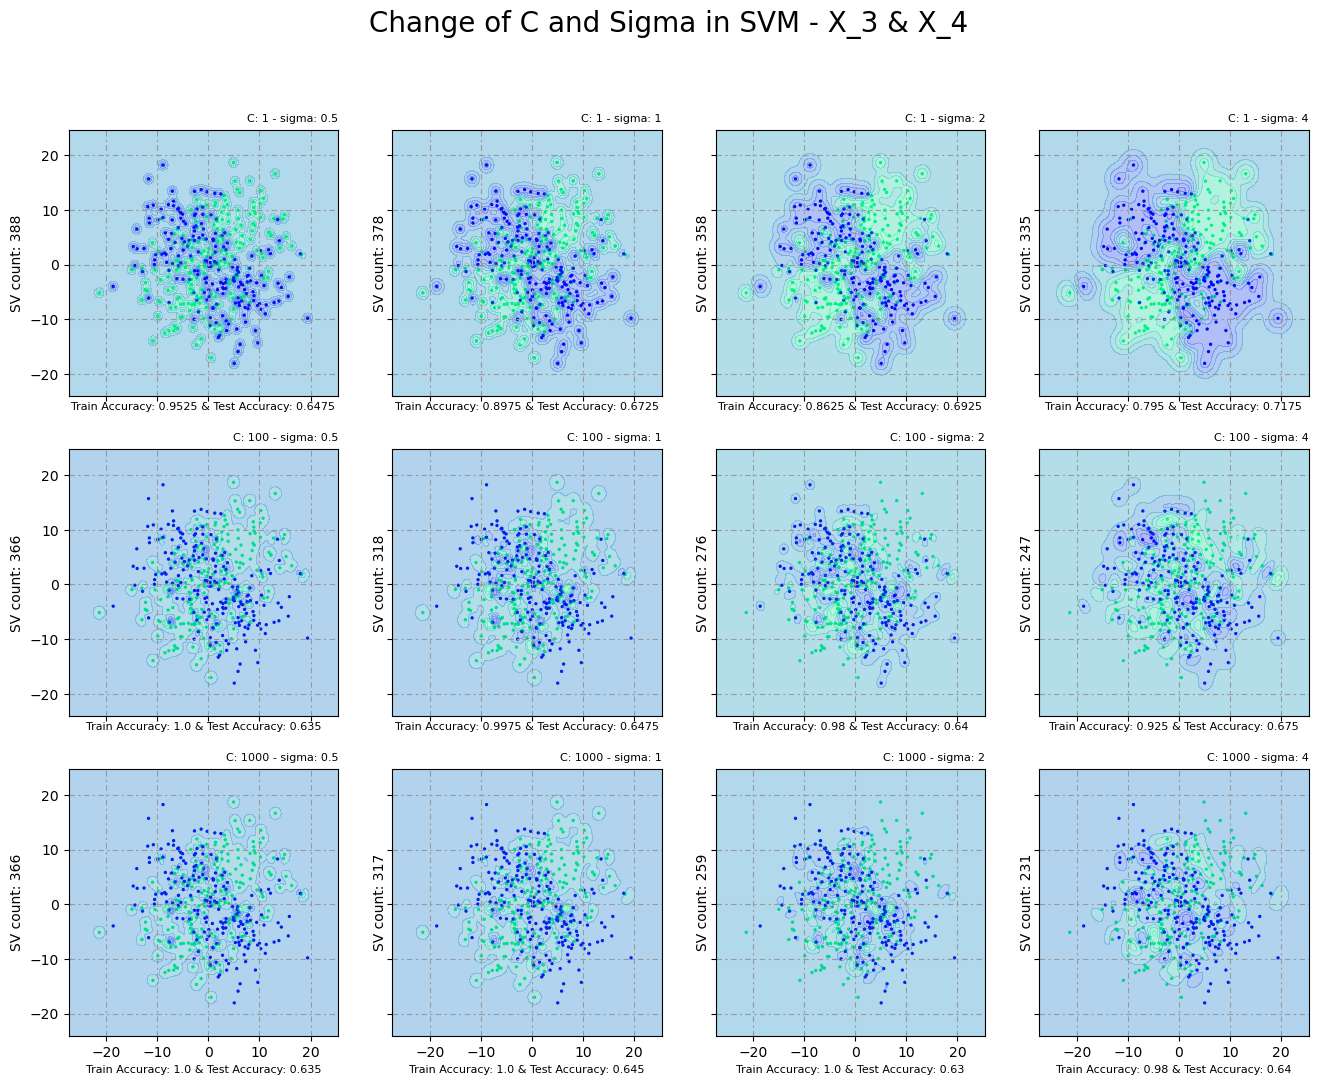

In [9]:
#structure of result figures
fig, ax = plt.subplots(3, 4, sharex= True, sharey= True, figsize=(16,12), dpi=100)
fig.suptitle('Change of C and Sigma in SVM - X_3 & X_4', fontsize=20)
conditions = [[1, 0.5], [1, 1], [1, 2], [1, 4],
              [100, 0.5], [100, 1], [100, 2], [100, 4],
              [1000, 0.5], [1000, 1], [1000, 2], [1000, 4]]

#trying different condition for C and sigma
for i, condition in enumerate(conditions):    
    
    #defining a SVM with tolerance of 0.001
    clf = svm.SVC(kernel= 'rbf', probability= True,
              tol= 0.001, C= condition[0], gamma= 1 / condition[1])          
              
    #training phase on X_3
    clf.fit(X[3], Y[3])
    #calculating accuracy of train
    num_correct_points = sum(clf.predict(X[3]).reshape(-1) == Y[3].reshape(-1))
    acc_train = num_correct_points / X[3].shape[0]
    #calculating accuracy of test
    num_correct_points = sum(clf.predict(X[4]).reshape(-1) == Y[4].reshape(-1))
    acc_test = num_correct_points / X[4].shape[0]
    #number of support vectors
    num_sv = sum(clf.n_support_)
    
    #plotting the result
    #making a mesh grid for showing the boundries
    x_min, x_max = X[3][:, 0].min() - 6, X[3][:, 0].max() + 6
    y_min, y_max = X[3][:, 1].min() - 6, X[3][:, 1].max() + 6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,1].reshape(xx.shape)
    
    #accuracy
    ax[i // 4,i % 4].set_xlabel(f'Train Accuracy: {acc_train} & Test Accuracy: {acc_test}', fontsize= 8)
    #number of support vectors
    ax[i // 4,i % 4].set_ylabel(f'SV count: {num_sv}')
    #title
    ax[i // 4,i % 4].set_title(f'C: {condition[0]} - sigma: {condition[1]}', loc= 'right', fontsize=8)
    #datapoints of X_3
    ax[i // 4,i % 4].scatter(X[3][:, 0], X[3][:, 1], c= Y[3], cmap= 'winter', s= 2)
    #boundries
    ax[i // 4,i % 4].contourf(xx, yy, Z, cmap='winter', alpha=0.3)
    #grid
    ax[i // 4,i % 4].grid(True, color='0.6', dashes=(5, 3, 2, 3))

Here we see a better difference: Higher value of sigma result in lower accuracy of train and higher accuracy of test. This means that we are doing better in real world.